# <b>EasySQ Demo 1</b>

## Demo 1 follows ["this"](https://squidpy.readthedocs.io/en/stable/notebooks/tutorials/tutorial_vizgen.html) Squidpy tutorial on analyzing vizgen data.

#### The purpose of EasySQ is to take a high level approach to Squidpy use.
<ul>
    <li>Get started with Squidpy in an easy to understand environment that can be easily translated into a more complex workflow.</li>
    <li>Abstract certain processes that are currently time consuming and complex in default Squidpy.</li>
    <li>Streamline and accelerate the process of outputing basic analysis.</li>
    <li>Work with more complex Squidpy processes through the use of both EasySQ and Squidpy.</li>
</ul>

#### For more information regarding any of the functions used below, see the corresponding [Squidpy documentation](https://squidpy.readthedocs.io/en/stable/api.html#).

### Install required libraries. Check the requirements.txt for a full list.

In [1]:
# !pip install scanpy
# !pip install squidpy
# !pip install scikit-misc

### Import the files for use in this demo.

In [2]:
import time
import EasySQ as esq

### Create our analysis object.

<ul>
<li>EasySQ needs to be wrapped in an <code>if __name_ == "__main__":</code> statement. You can call it from a function or put the code directly in the 'if.'</li>
<li>Provide a path to the directory containing your data. esq.Analysis will automatically import the two needed files if they contain these in the name, respectively:
    <ol>
    <li>"cell_metadata"</li>
    <li>"cell_by_gene"</li>
    </ol></li>
<li>Print the created adata object.</li>
</ul>

In [3]:
if __name__ == "__main__":
    t0 = time.time()  # time the execution of the program

    path = 'F:/sunlabmerfishdata/QSFL01222023/'
    # path = os.getcwd().replace('\\', '/') + '/tutorial_data/'
    esqAn = esq.Analysis(data_path=path)
    esqAn.print()
    


OBJECT INFO
object: <EasySQ.Analysis object at 0x000001E721991420>
object ID: 0m7764ng1

DATA
 data path: F:/sunlabmerfishdata/QSFL01222023/
 adata:
 AnnData object with n_obs × n_vars = 163850 × 140
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'



### Calculate the quality control methods for our data set.

This makes the variable names unique, calculates qc metrics, and returns the percent of cells/genes unassigned.

In [4]:
    perUn = esqAn.qcMetrics(percentTop=(50, 100, 125))
    print("percent unassigned: {}%".format(perUn))

percent unassigned: 1.7914030700922012%


### Calculate and plot the transcripts for the cells/genes.

Shows 4 plots regarding transcript data: 
<ol>
    <li>Total Transcripts per Cell</li>
    <li>Unique Transcripts per Cell</li>
    <li>Transcripts per FOV</li>
    <li>Volume of Segmented Cells</li>
</ol>
<code>plotTranscripts()</code> calculates and plots the graphs and <code>showPlots()</code> shows the plots.<br>
The <code>show</code> argument can be changed to 'True' to show plots immediately without calling <code>showPlots().</code>

C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

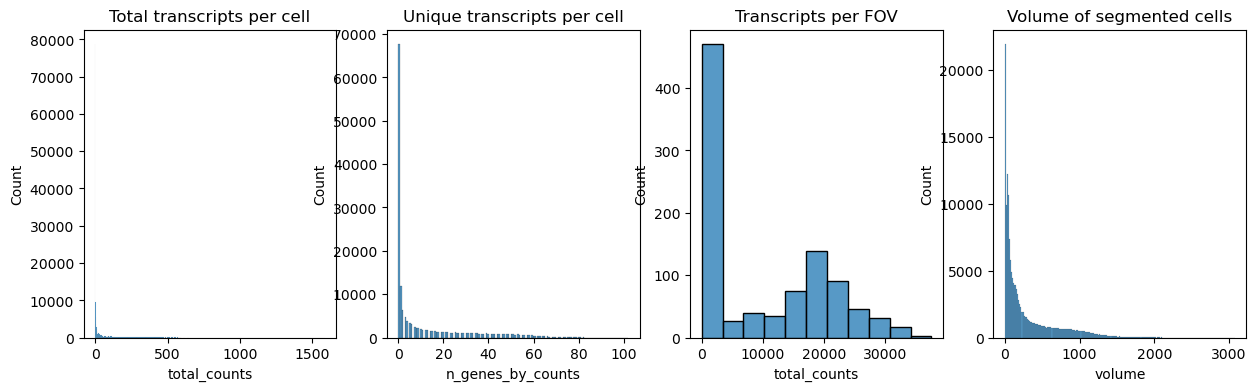

In [5]:
    esqAn.plotTranscripts(show=False)
    esqAn.showPlots()

### Filter the cells/genes based on counts and expression.

This particular call filters by counts.

In [6]:
    esqAn.filterCells(minCounts=10)

C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


### Run the calculations required to do basic analysis.

This is a high level overview, for more information, like what implementations are being used, see the [Squidpy documentation](https://squidpy.readthedocs.io/en/stable/api.html#) for each function.
<ul>
    <li><code>esqAn.layers()</code> sets the "counts" data in adata to a copy of the variables. IE, the expression data.</li>
    <li><code>esqAn.highlyVariableGenes()</code> annotates highly variable genes based on counts data. Default flavor is "seurat_v3."</li>
        <ul><li>You may have to install scikit-misc for <code>esqAn.highlyVariableGenes()</code>. This is also noted at the very top, under installs.</li></ul>
    <li><code>esqAn.normalizeTotal()</code> normalizes the counts per cell. Normalize each cell by total counts over all genes, so that every cell has the same total count after normalization.</li>
    <li><code>esqAn.log1p()</code> logarithmizes the data matrix.</li>
    <li><code>esqAn.pp_pca()</code> Principal component analysis. Computes PCA coordinates, loadings and variance decomposition.</li>
    <li><code>esqAn.pp_neighbors()</code> computes a neighborhood graph of observations.</li>
    <li><code>esqAn.tl_umap()</code> embeds a neighborhood graph using UMAP.</li>
    <li><code>esqAn.leiden()</code> clusters cells into subgroups using the Leiden algorithm.</li>
</ul>

In [7]:
    print("layers")
    esqAn.layers()
    print("highly variable genes")
    # !pip install scikit-misc  # if not already installed
    esqAn.highlyVariableGenes()
    print("normalize total")
    esqAn.normalizeTotal()
    print("log1p")
    esqAn.log1p()
    print("pca")
    esqAn.pp_pca()
    print("neighbors")
    esqAn.pp_neighbors()
    print("umap")
    esqAn.tl_umap()
    print("leiden")
    esqAn.leiden()

C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


layers
highly variable genes
normalize total
log1p
pca
neighbors
umap
leiden


### Setting a color palette to use with your data.

If you want to use a custom palette, or you want to use a resolution that is to big for the default, you can use <code>esqAn.setLeidenColors()</code>.
Provide it with a <code>color_file</code> located in a 'colors' directory in the current working directory.
The <code>color_file</code> needs to be a list of hex colors. Once you have done this, calling this method with the name of the file you created will load the
palette into your AnnData for use.

If you don't want to manually create one, EasySQ will automatically generate a palette for you if the default does not work, so you can comment this out if you'd like. See 'Error Warning:'

<code>setLeidenColors()</code> returns the list of hex colors set.

#### Error Warning:

If you get an unsupported operand error, of 'NoneType' and 'Str,' this comes from a file not found error for the provided <code>color_file</code>.
To fix this, ensure that the provided 'colors' directory containing the color sets is in the current working directory.
Alternatively, comment out this line and create your own, empty colors directory. EasySQ will automatically generate palettes for you and place them there.

In [8]:
    esqAn.setLeidenColors(color_file="leiden_generated_random_3.txt")

['#1DA309',
 '#AB5443',
 '#441AA5',
 '#EF6CE8',
 '#29E43A',
 '#36A271',
 '#8B025A',
 '#40E677',
 '#6DF7B9',
 '#3B06DA',
 '#50E5DA',
 '#FAA0E5',
 '#C34B73',
 '#C5FBEB',
 '#634BC8',
 '#1DBE46',
 '#FA1DAA',
 '#94DC30',
 '#6A3133',
 '#6CECB5',
 '#C30992',
 '#362738',
 '#4D1333',
 '#395BB2',
 '#3C4CB7',
 '#656861',
 '#B518B8',
 '#39AA22',
 '#9B8752',
 '#FC87BA',
 '#A68948',
 '#D706F2',
 '#1EB6BD',
 '#2B1DCA',
 '#C0C331',
 '#358338',
 '#E5AB1D',
 '#71C62B',
 '#731834',
 '#EBBA64',
 '#E227B2',
 '#61E129',
 '#6841DC',
 '#EE59B2',
 '#38A8C1',
 '#58FC9C',
 '#5A73DE',
 '#7BD9A2',
 '#E230D9',
 '#25F3D3',
 '#725473',
 '#17F3C0',
 '#6970EC',
 '#9EB9E3',
 '#E7C2DA',
 '#8E952A',
 '#5A0B99',
 '#32CB0D',
 '#6DC6B8',
 '#E8CDA9',
 '#B0D39A',
 '#44F45A',
 '#B17C16',
 '#625962',
 '#6CA55E',
 '#C89272',
 '#2135EF',
 '#924A09',
 '#14954E',
 '#1B9D7E',
 '#341DF9',
 '#D7FBA4',
 '#29CE5D',
 '#E5BE6C',
 '#EBDA17',
 '#46A583',
 '#13F4D8',
 '#2885A6',
 '#2CACCE',
 '#CBFB2E',
 '#D0084D',
 '#1E171B',
 '#4A1C44',
 '#C

### Plotting UMAPs with EasySQ.

Plotting UMAPs works similarly to the <code>esqAn.spatialScatter()</code> function. <code>esqAn.pl_umap()</code> accepts the <code>graphs</code> paramater, which should be a list of the graphs you want to plot.
In this example we are plotting the <code>"total_counts"</code>, <code>"n_genes_by_counts"</code>, and <code>"leiden"</code> plots. For this to run, you must have run <code>tl_umap()</code> earlier, as it sets up the data.

We then plot the spatial scatter for <code>"leiden"</code> and show the plots.

Its ok if you get a blank graph when doing this. Sometimes, when recalculating palettes and resizing, graphs have to be deleted and recreated which can cause this issue.

pl_UMAP


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Too many colors in palette! Automatically reducing size now!


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:471:

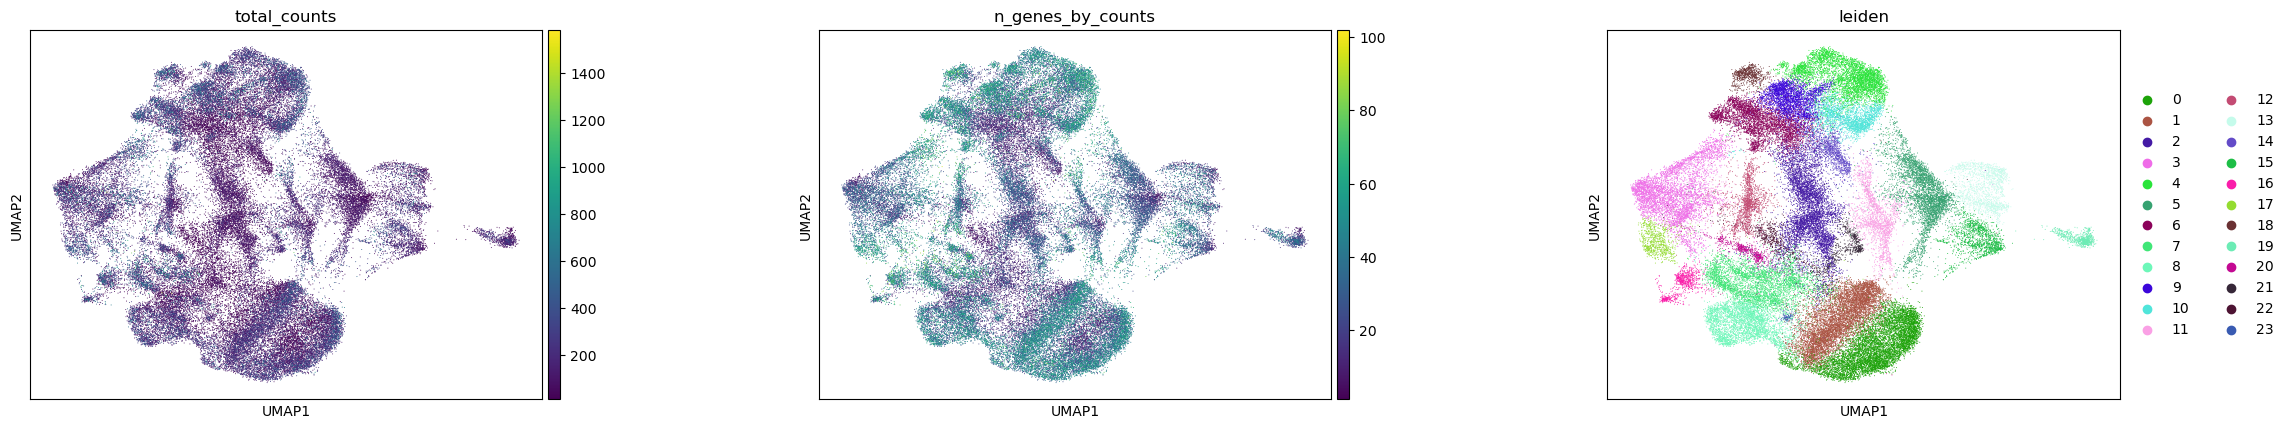

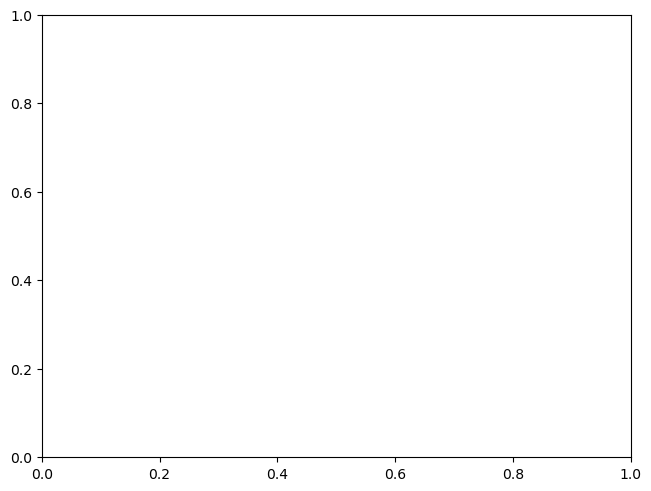

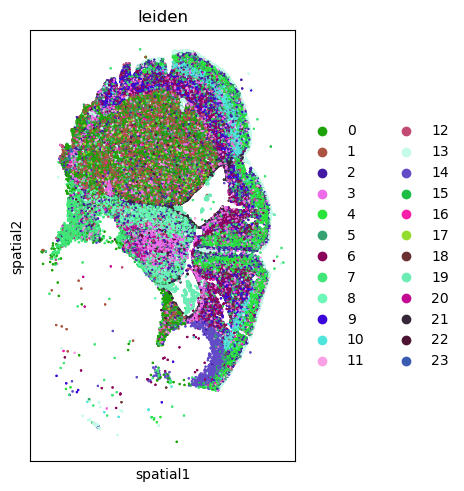

In [9]:
    print("pl_UMAP")
    esqAn.pl_umap(graphs=["total_counts", "n_genes_by_counts", "leiden"])
    esqAn.spatialScatter(graphs=["leiden"])
    esqAn.showPlots()

### Calculating the spatial neighbors.

<code>esqAn.gr_spatialNeighbors()</code> creates a graph based on spatial coordinates.

In [10]:
    print("spatial neighbors")
    esqAn.gr_spatialNeighbors(delaunay=True)

spatial neighbors


### Computing and plotting the centrality scores.

<code>esqAn.gr_centralityScores()</code> computes the centrality scores per cluster or cell type.<br>
<code>esqAn.pl_centralityScores()</code> plots the computed scores.

compute centrality scores


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use is

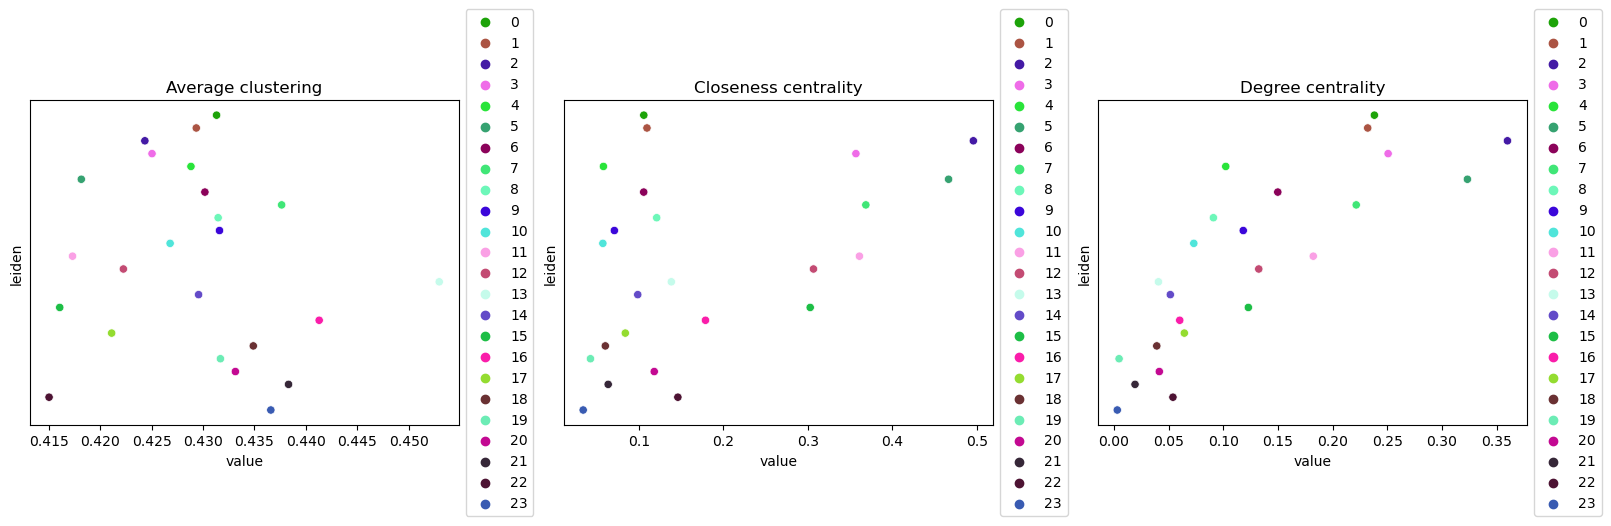

In [11]:
    print("compute centrality scores")
    esqAn.gr_centralityScores()
    esqAn.pl_centralityScores(figsize=(16, 5))

### Creating subsamples and computing and plotting the co-occurrence probability.

<code>esqAn.adataSubsample()</code> creates a subsample to a fraction of the observations.<br>
This can be used to do analysis on a smaller fraction of data.<br>
<code>esqAn.gr_co_occurrence</code> calculates the co_occurrence probabilities.<br>
<code>esqAn.pl_co_occurence</code> plots them.

co-occurrence probability


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


  0%|          | 0/136 [00:00<?, ?/s]

C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

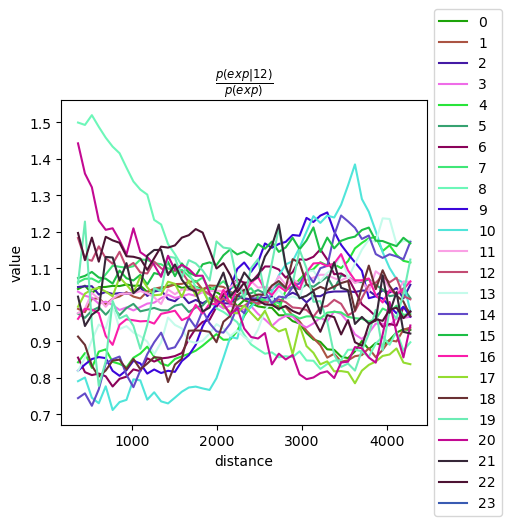

In [12]:
    print("co-occurrence probability")
    adata_subsample = esqAn.adataSubsample(fraction=0.5, copy=True)
    esqAn.gr_co_occurrence(adata=adata_subsample)
    esqAn.pl_co_occurrence(adata=adata_subsample)

### Plot a spatial scatter using the leiden graph on the subsample we created.

<code>esqAn.spatialScatter</code> creates a spatial scatter using the given graph.<br>
<code>esqAn.availableGraphs()</code>, while note used here, can be used to display all of the available graphs currently available for plotting.<br>
<code>esqAn.showPlots()</code> as we've seen before, shows all the plots created but not shown up to this point.

C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\scrouse2\App

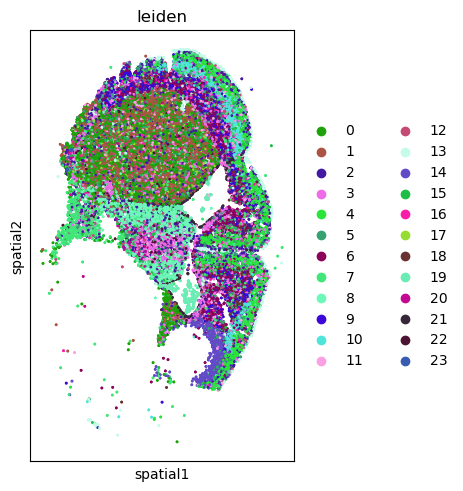

In [13]:
    esqAn.spatialScatter(adata=adata_subsample, graphs="leiden")
    esqAn.showPlots()

### Calculate and plot the neighborhood enrichment.

<code>esqAn.gr_nhoodEnrichment()</code> calculates the neighborhood enrichment data.
<code>esqAn.pl_nhoodEnrichment()</code> plots the calculated data.

You might be seeing a pattern with these function calls. Generally, functions preceded with <code>gr_</code> and <code>tl_</code> are calculation functions.<br>
Functions preceded with <code>pl_</code> are generally plotting functions.<br>
While this is not true for all functions (some calculate and plot) this is a good rule of thumb when dealing with these prefixes.

### Run another leiden spatial scatter after neighborhood analysis.

Similar steps for spatial scatters and showing as above so that we can see the leiden plot alongside the neighborhood graph.

neighbors enrichment analysis


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


  0%|          | 0/1000 [00:00<?, ?/s]

C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_utils.py:556: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_labels = adata.obs[key][row_order]
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\anndata\_core\anndata.py:1113: Future

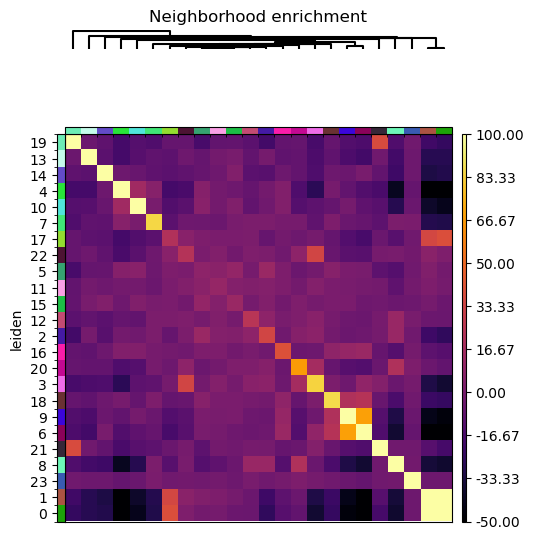

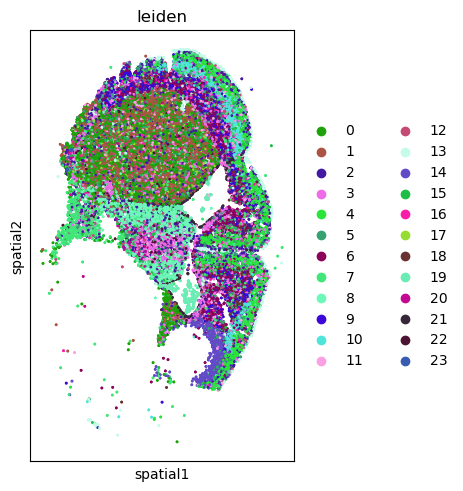

In [14]:
    print("neighbors enrichment analysis")
    esqAn.gr_nhoodEnrichment()
    esqAn.pl_nhoodEnrichment()
    
    esqAn.spatialScatter(adata=adata_subsample, graphs="leiden")
    esqAn.showPlots()

### Calculate and plot Ripley's statistics.

<code>esqAn.gr_ripley()</code> calculates the Ripley's statistics.<br>
<code>esqAn.pl_ripley()</code> plots the Ripley's statistics.<br>
Once again, <code>esqAn.spatialScatter</code> is used to graph the leiden data. Now <code>groups</code> can be used to plot only specific data. All other data in the plot is set to NAs.

Ripley's statistics


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\gr\_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use i

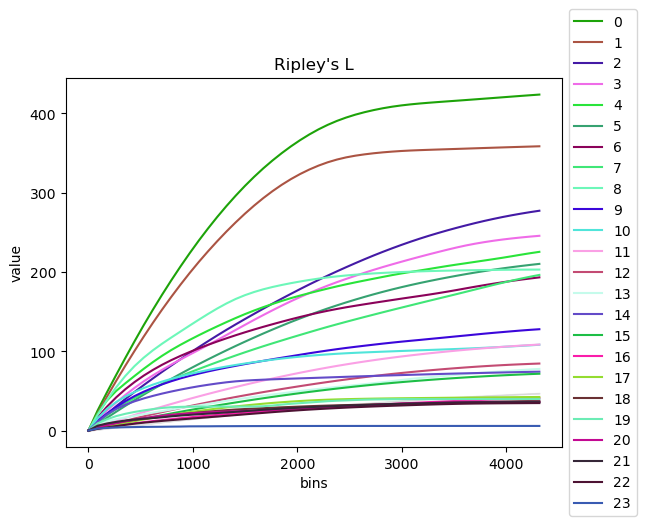

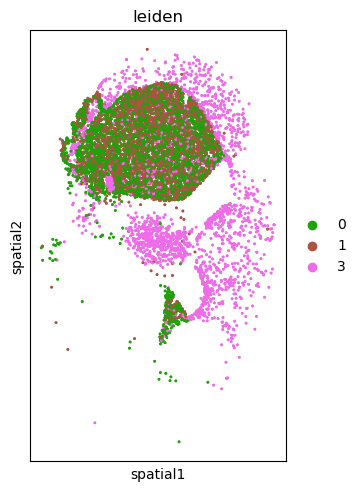

In [15]:
    print("Ripley's statistics")
    esqAn.gr_ripley()
    esqAn.pl_ripley()
    esqAn.spatialScatter(adata=adata_subsample, graphs="leiden", groups=["0", "1", "3"])
    esqAn.showPlots()

### Calculate Moran's I score.

This differs slightly from the above pattern, as we aren't plotting anything here. We are now outputting Moran's I score directly to the console.<br>
<code>esqAn.gr_spatialAutocorr</code> calculates the spatial autocorrelation.<br>
<code>adata_subsample.uns["moranI"].head(10)</code> accesses the adata subsample where the Moran's data is stored and returns the first 10 rows.

In [16]:
    print("Moran's I score")
    esqAn.gr_spatialNeighbors(adata=adata_subsample, delaunay=True)
    esqAn.gr_spatialAutocorr(adata=adata_subsample, nPerms=100, nJobs=1)
    print(adata_subsample.uns["moranI"].head(10))

Moran's I score


C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


  0%|          | 0/100 [00:00<?, ?/s]

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
Slc17a7,0.798446,0.0,0.000011,0.0,0.009901,0.000031,0.0,0.0,0.010192
Igfbp2,0.523581,0.0,0.000011,0.0,0.009901,0.000019,0.0,0.0,0.010192
Bcl11b,0.458495,0.0,0.000011,0.0,0.009901,0.000017,0.0,0.0,0.010192
Meis2,0.455626,0.0,0.000011,0.0,0.009901,0.000017,0.0,0.0,0.010192
Penk,0.451322,0.0,0.000011,0.0,0.009901,0.000021,0.0,0.0,0.010192
Foxj1,0.448605,0.0,0.000011,0.0,0.009901,0.000017,0.0,0.0,0.010192
Gfap,0.417321,0.0,0.000011,0.0,0.009901,0.000015,0.0,0.0,0.010192
Slc32a1,0.413424,0.0,0.000011,0.0,0.009901,0.000018,0.0,0.0,0.010192
Cnr1,0.403821,0.0,0.000011,0.0,0.009901,0.000014,0.0,0.0,0.010192
Cux2,0.400733,0.0,0.000011,0.0,0.009901,0.000014,0.0,0.0,0.010192


### Plot gene expression.

The last output showed us some top genes. We are going to plot the top two here.

C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\scrouse2\AppData\Local\anaconda3\lib\site-packages\squidpy\pl\_spatial_utils.py:649: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(color_source_vector):


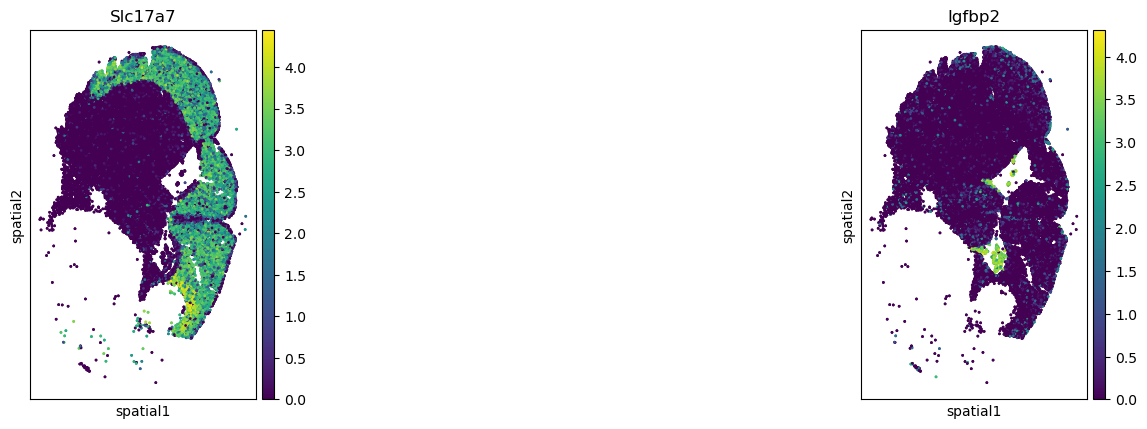

In [17]:
    esqAn.spatialScatter(adata=adata_subsample, graphs=["Slc17a7", "Igfbp2"])
    esqAn.showPlots()

### End the timer and show any remaining plots.

If you want to run this in a non notebook format (or a format where plotting might pause the execution), you can comment out all of the <code>showPlots()</code> except for this last one, to get an accurate timing count.<br>
IE just show all the plots at the end.

In [18]:
    t1 = time.time()
    totalTime = t1 - t0
    print("time elapsed: {}".format(totalTime))

    esqAn.showPlots()  # If there are no plots to show, this does nothing!

time elapsed: 299.9255487918854
